In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

car_crashes = pd.read_csv('datasets/car_crashes.csv')
car_crashes.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

In [2]:
# 1. Car crashes per million miles

car_crashes['total_per_million'] = car_crashes['total']*1000
car_crashes.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  total_per_million  
0      145.08     AL            18800.0  
1      133.93     AK            18100.0  
2      110.35     AZ            18600.0  
3      142.39     AR            22400.0  
4      165.63     CA            12000.0

In [3]:
# 2. Average premium for region

regions = pd.read_csv('datasets/census-divisions.csv')

car_crashes_merged = car_crashes.merge(regions, how='left')
car_crashes_merged.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  total_per_million       state region            division  
0      145.08     AL            18800.0     Alabama  South  East South Central  
1      133.93     AK            18100.0      Alaska   West             Pacific  
2      110.35     AZ            18600.0     Arizona   West            Mountain  
3      142.39     AR            22400.0    Arkansas  South  West South Central  
4      165.63     CA            12000.0  California   West             Pacific

In [4]:
car_crashes_merged.groupby('region')[['ins_premium']].mean()

ins_premium
region                
Midwest     756.630833
Northeast   977.255556
South       951.692941
West        860.091538

In [5]:
# 3. Distribution looks normal...
# sns.displot(x='no_previous', data=car_crashes_merged)

Text(0.5, 1.0, 'Losses incurred vs insurance premiums by state')

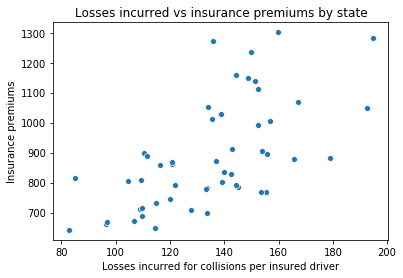

In [6]:
# 4. Losses vs premiums
sns.scatterplot(x='ins_losses', y='ins_premium', data=car_crashes_merged)

plt.xlabel('Losses incurred for collisions per insured driver')
plt.ylabel('Insurance premiums')
plt.title('Losses incurred vs insurance premiums by state')

In [7]:
# 5. Reproduce the dataset
crash_pivot = pd.melt(frame=car_crashes_merged, id_vars = 'abbrev',
            value_vars=['ins_premium', 'ins_losses'], value_name='amount',
            var_name='value')
crash_pivot.head()

abbrev        value   amount
0     AL  ins_premium   784.55
1     AK  ins_premium  1053.48
2     AZ  ins_premium   899.47
3     AR  ins_premium   827.34
4     CA  ins_premium   878.41

In [8]:
crash_pivot['value'] = crash_pivot['value'].map({'ins_premium':'premium', 'ins_losses':'losses'})
crash_pivot['value'].unique()

array(['premium', 'losses'], dtype=object)